<div style="text-align:center;margin-bottom:50px;">
    <img src="img/LogoSingleRow.png" style="max-width:600px;">
</div>

# PyCaret

## Imports and data loading

In [1]:
from pycaret.classification import * 
from pycaret.datasets import get_data

diabetes = get_data('diabetes')
exp_clf = setup(diabetes, target='Class variable')

 
Setup Succesfully Completed!


<br><br>

## Finding optimal model

In [2]:
compare_models()

In [3]:
xgb = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7778  0.8466  0.7368  0.6667  0.7000  0.5242
1       0.6852  0.7368  0.3684  0.5833  0.4516  0.2463
2       0.7778  0.8090  0.5789  0.7333  0.6471  0.4882
3       0.7037  0.7789  0.5789  0.5789  0.5789  0.3504
4       0.7963  0.8962  0.6842  0.7222  0.7027  0.5479
5       0.6852  0.7429  0.4211  0.5714  0.4848  0.2656
6       0.7778  0.8195  0.5789  0.7333  0.6471  0.4882
7       0.7925  0.8413  0.6667  0.7059  0.6857  0.5310
8       0.8302  0.8698  0.7778  0.7368  0.7568  0.6265
9       0.7736  0.8984  0.7778  0.6364  0.7000  0.5211
Mean    0.7600  0.8240  0.6170  0.6668  0.6355  0.4589
SD      0.0477  0.0549  0.1333  0.0656  0.0949  0.1206

## Visualizing model performance

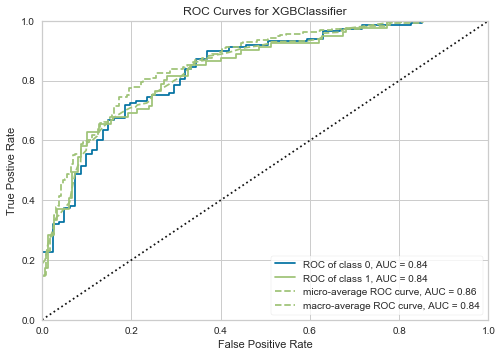

In [4]:
plot_model(xgb)

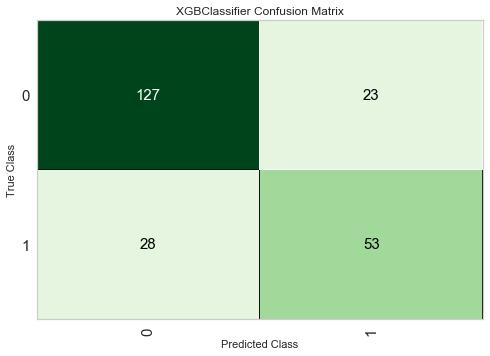

In [5]:
plot_model(xgb, 'confusion_matrix')

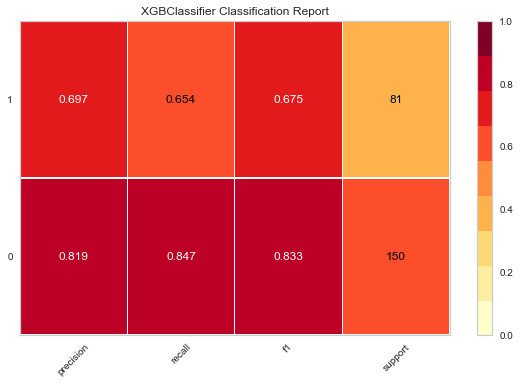

In [6]:
plot_model(xgb, 'class_report')

<br><br>

## Model interpretation with SHAP

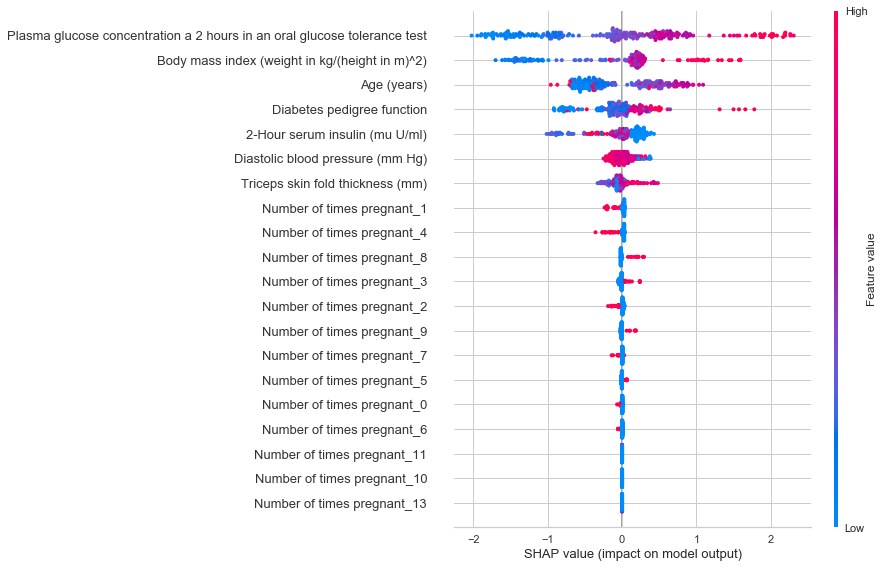

In [7]:
interpret_model(xgb)

<br><br>

## Predictions

In [8]:
predictions = predict_model(xgb)

Model  Accuracy    AUC  Recall   Prec.      F1   Kappa
0  Extreme Gradient Boosting    0.7792  0.839  0.6543  0.6974  0.6752  0.5082

<br><br>

## Model saving and loading

In [9]:
finalize_model(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2895,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [10]:
save_model(xgb, 'diabetes_xgboost')

Transformation Pipeline and Model Succesfully Saved


In [11]:
model = load_model('diabetes_xgboost')

Transformation Pipeline and Model Sucessfully Loaded


<br><br>

## Model deployment

In [ ]:
deploy_model(
    model, 
    model_name='xgboost_aws', 
    platform='aws', 
    authentication={'bucket': 'pycaret-test'}
)